# Block Diagrams (RBD-style) for Reliability Architectures

This notebook draws **block-style** (RBD-like) diagrams using **Matplotlib** (no Graphviz required).

Architectures included:
- Series (3)
- Parallel (3)
- Series–Parallel (3 stages, 2 in parallel per stage)
- Parallel–Series (3 branches, 2 in series per branch)
- 2-out-of-3 Voting


## 0) Imports + drawing utilities

We implement helpers to draw rectangular blocks and arrows.


In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

def draw_block(ax, xy, w, h, label, fontsize=10):
    """Draw a labeled rectangle (block) with black edges and white fill."""
    x, y = xy
    rect = Rectangle((x, y), w, h, linewidth=1.2, edgecolor="black", facecolor="white")
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, label, ha="center", va="center", fontsize=fontsize)
    return rect

def draw_arrow(ax, start, end):
    """Draw an arrow between two points."""
    arrow = FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=12,
                            linewidth=1.2, color="black")
    ax.add_patch(arrow)

def setup_ax(title, xlim, ylim):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_title(title)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_aspect("equal")
    ax.axis("off")
    return fig, ax

def right_mid(rect):
    x, y = rect.get_xy()
    w, h = rect.get_width(), rect.get_height()
    return (x + w, y + h/2)

def left_mid(rect):
    x, y = rect.get_xy()
    w, h = rect.get_width(), rect.get_height()
    return (x, y + h/2)


## 1) Series system (3 components)

Structure: `E -> C1 -> C2 -> C3 -> S`


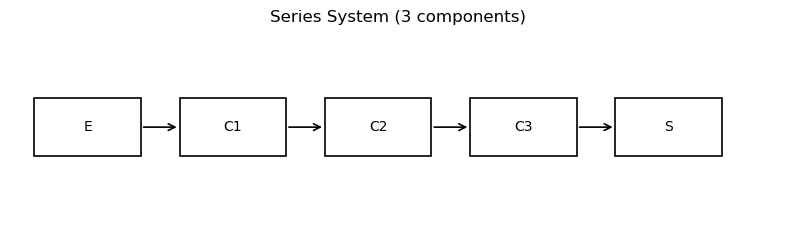

In [36]:
fig, ax = setup_ax("Series System (3 components)", xlim=(0, 16), ylim=(0, 4))

w, h = 2.2, 1.2
E  = draw_block(ax, (0.5, 1.4), w, h, "E")
C1 = draw_block(ax, (3.5, 1.4), w, h, "C1")
C2 = draw_block(ax, (6.5, 1.4), w, h, "C2")
C3 = draw_block(ax, (9.5, 1.4), w, h, "C3")
S  = draw_block(ax, (12.5, 1.4), w, h, "S")

draw_arrow(ax, right_mid(E), left_mid(C1))
draw_arrow(ax, right_mid(C1), left_mid(C2))
draw_arrow(ax, right_mid(C2), left_mid(C3))
draw_arrow(ax, right_mid(C3), left_mid(S))

plt.show()


## 2) Parallel system (3 components)

Structure: three components in parallel from `E` to `S`.


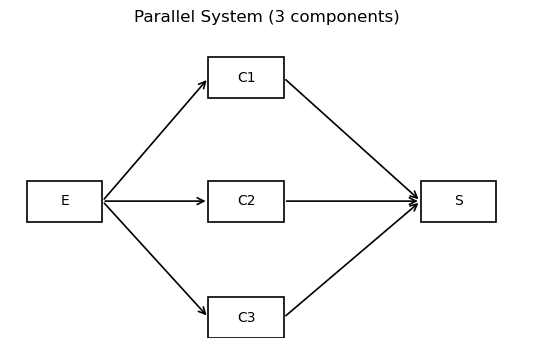

In [44]:
fig, ax = setup_ax("Parallel System (3 components)", xlim=(0, 15), ylim=(0, 9))

w, h = 2.2, 1.2
E = draw_block(ax, (0.5, 3.4), w, h, "E")
S = draw_block(ax, (12.0, 3.4), w, h, "S")

C1 = draw_block(ax, (5.8, 7.0), w, h, "C1")
C2 = draw_block(ax, (5.8, 3.4), w, h, "C2")
C3 = draw_block(ax, (5.8, 0), w, h, "C3")

draw_arrow(ax, right_mid(E), left_mid(C1))
draw_arrow(ax, right_mid(E), left_mid(C2))
draw_arrow(ax, right_mid(E), left_mid(C3))

draw_arrow(ax, right_mid(C1), left_mid(S))
draw_arrow(ax, right_mid(C2), left_mid(S))
draw_arrow(ax, right_mid(C3), left_mid(S))

plt.show()


## 3) Series–Parallel (3 stages, each stage = 2 in parallel)

Structure: `(A1 || A2) - (B1 || B2) - (C1 || C2)`


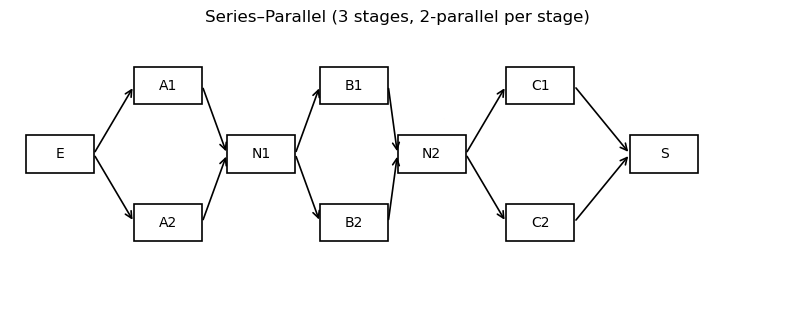

In [46]:
fig, ax = setup_ax("Series–Parallel (3 stages, 2-parallel per stage)", xlim=(0, 25), ylim=(0, 9))

w, h = 2.2, 1.2
E = draw_block(ax, (0.5, 4.4), w, h, "E")
S = draw_block(ax, (20.0, 4.4), w, h, "S")

A1 = draw_block(ax, (4.0, 6.6), w, h, "A1")
A2 = draw_block(ax, (4.0, 2.2), w, h, "A2")
N1 = draw_block(ax, (7.0, 4.4), w, h, "N1")

B1 = draw_block(ax, (10, 6.6), w, h, "B1")
B2 = draw_block(ax, (10, 2.2), w, h, "B2")
N2 = draw_block(ax, (12.5, 4.4), w, h, "N2")

C1 = draw_block(ax, (16, 6.6), w, h, "C1")
C2 = draw_block(ax, (16, 2.2), w, h, "C2")

ARROW_OFFSET = 0


def right_mid_out(block):
    x, y = right_mid(block)
    return (x + ARROW_OFFSET, y)

def left_mid_out(block):
    x, y = left_mid(block)
    return (x - ARROW_OFFSET, y)

draw_arrow(ax, right_mid_out(E), left_mid_out(A1))
draw_arrow(ax, right_mid_out(E), left_mid_out(A2))

draw_arrow(ax, right_mid_out(A1), left_mid_out(N1))
draw_arrow(ax, right_mid_out(A2), left_mid_out(N1))

draw_arrow(ax, right_mid_out(N1), left_mid_out(B1))
draw_arrow(ax, right_mid_out(N1), left_mid_out(B2))

draw_arrow(ax, right_mid_out(B1), left_mid_out(N2))
draw_arrow(ax, right_mid_out(B2), left_mid_out(N2))

draw_arrow(ax, right_mid_out(N2), left_mid_out(C1))
draw_arrow(ax, right_mid_out(N2), left_mid_out(C2))

draw_arrow(ax, right_mid_out(C1), left_mid_out(S))
draw_arrow(ax, right_mid_out(C2), left_mid_out(S))

plt.show()


## 4) Parallel–Series (3 branches, each branch = 2 in series)

Structure: `(A1-A2) || (B1-B2) || (C1-C2)`


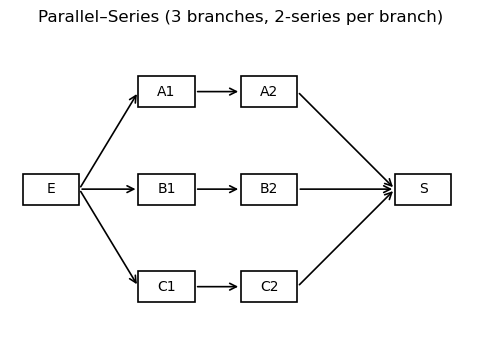

In [5]:
fig, ax = setup_ax("Parallel–Series (3 branches, 2-series per branch)", xlim=(0, 18), ylim=(0, 12))

w, h = 2.2, 1.2
E = draw_block(ax, (0.5, 5.2), w, h, "E")
S = draw_block(ax, (15.0, 5.2), w, h, "S")

A1 = draw_block(ax, (5.0, 9.0), w, h, "A1")
A2 = draw_block(ax, (9.0, 9.0), w, h, "A2")

B1 = draw_block(ax, (5.0, 5.2), w, h, "B1")
B2 = draw_block(ax, (9.0, 5.2), w, h, "B2")

C1 = draw_block(ax, (5.0, 1.4), w, h, "C1")
C2 = draw_block(ax, (9.0, 1.4), w, h, "C2")

draw_arrow(ax, right_mid(E), left_mid(A1))
draw_arrow(ax, right_mid(E), left_mid(B1))
draw_arrow(ax, right_mid(E), left_mid(C1))

draw_arrow(ax, right_mid(A1), left_mid(A2))
draw_arrow(ax, right_mid(B1), left_mid(B2))
draw_arrow(ax, right_mid(C1), left_mid(C2))

draw_arrow(ax, right_mid(A2), left_mid(S))
draw_arrow(ax, right_mid(B2), left_mid(S))
draw_arrow(ax, right_mid(C2), left_mid(S))

plt.show()


## 5) 2-out-of-3 Voting system

Blocks: `E -> (C1, C2, C3) -> Voter(2/3) -> S`


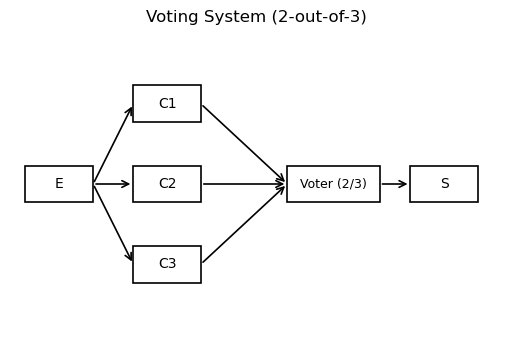

In [6]:
fig, ax = setup_ax("Voting System (2-out-of-3)", xlim=(0, 16), ylim=(0, 10))

w, h = 2.2, 1.2
E = draw_block(ax, (0.5, 4.4), w, h, "E")
V = draw_block(ax, (9.0, 4.4), w+0.8, h, "Voter (2/3)", fontsize=9)
S = draw_block(ax, (13.0, 4.4), w, h, "S")

C1 = draw_block(ax, (4.0, 7.0), w, h, "C1")
C2 = draw_block(ax, (4.0, 4.4), w, h, "C2")
C3 = draw_block(ax, (4.0, 1.8), w, h, "C3")

draw_arrow(ax, right_mid(E), left_mid(C1))
draw_arrow(ax, right_mid(E), left_mid(C2))
draw_arrow(ax, right_mid(E), left_mid(C3))

draw_arrow(ax, right_mid(C1), left_mid(V))
draw_arrow(ax, right_mid(C2), left_mid(V))
draw_arrow(ax, right_mid(C3), left_mid(V))

draw_arrow(ax, right_mid(V), left_mid(S))

plt.show()


## Run from Command Line (Windows)

If you saved this notebook in your **Downloads** folder, run:

```bash
cd %USERPROFILE%\Downloads
jupyter notebook block_diagrams_reliability_architectures.ipynb
```

If you use a conda environment, activate it first, for example:

```bash
conda activate reliability
```
